In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

from data.utils import get_week_range_df, to_week_range
from models.ar_model import ARModelSpecification, create_ar_models_report, create_all_ar_models_report
from models.persistence_model import create_persistence

# Global set-up
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['axes.grid'] = True
sns.set_style("whitegrid")

# Global set-up
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['axes.grid'] = True
sns.set_style("whitegrid")

In [28]:
GROUND_TRUTH_COLUMN = 'Disease Rate'
PERSISTENCE_SHIFT = 2
PERSISTENCE_COL_NAME = 'Persistence'
LAGS = 20

In [29]:
DF = get_week_range_df('week range')
DF = create_persistence(DF, shift=PERSISTENCE_SHIFT, persistance_col_name=PERSISTENCE_COL_NAME)
DF

,year,week,a flu,baby flu,bad flu,chest infection symptoms,child flu,children flu,cold and flu symptoms,cold flu,...,night nurse,stop coughing,tamiflu,tamiflu dosage,tamiflu side effects,the death cure,what is tamiflu,what to eat when you have the flu,Disease Rate,Persistence
week range,,,,,,,,,,,,,,,,,,,,,
2004-01-12/2004-01-18,2004,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,107.997079,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,8.808089,18.716703
2004-01-19/2004-01-25,2004,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.092730,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.575904,12.366981
2004-01-26/2004-02-01,2004,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.837619,8.808089
2004-02-02/2004-02-08,2004,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,4.793484,6.575904
2004-02-09/2004-02-15,2004,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.779651,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,4.967228,6.837619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-19/2018-11-25,2018,47,357.530206,41.092217,27.220088,60.270243,48.803031,72.338072,21.485834,277.574666,...,129.701997,96.073783,12.137666,0.0,0.0,5.941338,0.0,12.850613,6.175297,4.848258
2018-11-26/2018-12-02,2018,48,343.500128,40.303629,25.485104,80.116784,70.849770,102.013875,21.244784,247.225283,...,157.086094,49.510694,24.747760,0.0,0.0,28.375626,0.0,5.905376,7.382408,6.586396
2018-12-03/2018-12-09,2018,49,263.128745,38.461304,27.229028,63.119445,43.211300,66.995693,18.879464,235.339674,...,118.620181,85.829489,11.640776,0.0,0.0,21.390838,0.0,0.000000,8.012008,6.175297


In [30]:
MODEL_SPECS = [
    ARModelSpecification(order=(3, 0, 1), model_class=SARIMAX),
]

In [31]:
train_interval = (to_week_range(2004, 3), to_week_range(2009, 1))
test_interval = (to_week_range(2009, 1), to_week_range(2009, 52))

In [32]:
ar_model_report = create_ar_models_report(data=DF, ar_model_specs=MODEL_SPECS, train_interval=train_interval,
                                          test_interval=test_interval, additional_model_cols=[PERSISTENCE_COL_NAME],
                                          cov_type=None, train_maxiter=3000, optimize_method='powell', steps=2)

Training model statsmodels.tsa.statespace.sarimax.SARIMAX (3, 0, 1)(0, 0, 0, 0) ...

Optimization terminated successfully.
         Current function value: 2.366211
         Iterations: 1
         Function evaluations: 59
Testing model statsmodels.tsa.statespace.sarimax.SARIMAX (3, 0, 1)(0, 0, 0, 0) ...



2008-12-29/2009-01-04     31.912983
2009-01-05/2009-01-11     29.763984
2009-01-12/2009-01-18     18.256061
2009-01-19/2009-01-25      8.816486
2009-01-26/2009-02-01      4.079498
2009-02-02/2009-02-08      2.253135
2009-02-09/2009-02-15      1.862803
2009-02-16/2009-02-22      1.574638
2009-02-23/2009-03-01      1.219117
2009-03-02/2009-03-08      0.857450
2009-03-09/2009-03-15      0.149320
2009-03-16/2009-03-22     -0.329432
2009-03-23/2009-03-29     -0.321679
2009-03-30/2009-04-05     -1.080444
2009-04-06/2009-04-12     -2.098935
2009-04-13/2009-04-19     -2.414864
2009-04-20/2009-04-26     -1.621766
2009-04-27/2009-05-03      4.290797
2009-05-04/2009-05-10      4.016746
2009-05-11/2009-05-17      3.205667
2009-05-18/2009-05-24      1.519202
2009-05-25/2009-05-31     -1.147497
2009-06-01/2009-06-07     -0.142454
2009-06-08/2009-06-14      1.679944
2009-06-15/2009-06-21      4.880342
2009-06-22/2009-06-28     15.462738
2009-06-29/2009-07-05     29.245184
2009-07-06/2009-07-12     62

week range
2008-12-29/2009-01-04     31.912983
2009-01-05/2009-01-11     21.271921
2009-01-12/2009-01-18     12.543404
2009-01-19/2009-01-25      8.163241
2009-01-26/2009-02-01      6.474453
2009-02-02/2009-02-08      6.113524
2009-02-09/2009-02-15      5.847066
2009-02-16/2009-02-22      5.518325
2009-02-23/2009-03-01      5.183901
2009-03-02/2009-03-08      4.529113
2009-03-09/2009-03-15      4.086424
2009-03-16/2009-03-22      4.093593
2009-03-23/2009-03-29      3.391984
2009-03-30/2009-04-05      2.450213
2009-04-06/2009-04-12      2.158083
2009-04-13/2009-04-19      2.891439
2009-04-20/2009-04-26      8.358623
2009-04-27/2009-05-03      8.105216
2009-05-04/2009-05-10      7.355233
2009-05-11/2009-05-17      5.795805
2009-05-18/2009-05-24      3.329982
2009-05-25/2009-05-31      4.259317
2009-06-01/2009-06-07      5.944439
2009-06-08/2009-06-14      8.903760
2009-06-15/2009-06-21     18.689011
2009-06-22/2009-06-28     31.433262
2009-06-29/2009-07-05     61.937381
2009-07-06/2009-0

,year,week,a flu,baby flu,bad flu,chest infection symptoms,child flu,children flu,cold and flu symptoms,cold flu,...,stop coughing,tamiflu,tamiflu dosage,tamiflu side effects,the death cure,what is tamiflu,what to eat when you have the flu,Disease Rate,Persistence,"0 (3, 0, 1)(0, 0, 0, 0)"
week range,,,,,,,,,,,,,,,,,,,,,
2008-12-29/2009-01-04,2009,1,59.039856,0.000000,0.000000,19.304410,0.000000,0.000000,0.000000,37.748808,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,31.912983,27.776433,31.912983
2009-01-05/2009-01-11,2009,2,24.262553,21.983805,0.000000,9.483209,0.000000,0.000000,0.000000,60.246177,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,21.271921,36.426270,29.763984
2009-01-12/2009-01-18,2009,3,12.391474,0.000000,0.000000,13.846754,0.000000,0.000000,0.000000,88.658630,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,12.543404,31.912983,18.256061
2009-01-19/2009-01-25,2009,4,71.500085,0.000000,0.000000,27.938753,0.000000,9.099710,0.000000,73.382968,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,8.163241,21.271921,8.816486
2009-01-26/2009-02-01,2009,5,9.329809,0.000000,0.000000,9.329809,0.000000,0.000000,0.000000,36.254622,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,6.474453,12.543404,4.079498
2009-02-02/2009-02-08,2009,6,38.415301,0.000000,0.000000,9.439102,0.000000,0.000000,9.415560,47.308459,...,0.000000,0.000000,0.0,0.0,34.788179,0.0,0.0,6.113524,8.163241,2.253135
2009-02-09/2009-02-15,2009,7,0.000000,0.000000,9.073376,0.000000,0.000000,0.000000,0.000000,83.434044,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,5.847066,6.474453,1.862803
2009-02-16/2009-02-22,2009,8,21.190899,8.773741,0.000000,21.339274,0.000000,0.000000,0.000000,36.000411,...,0.000000,31.632464,0.0,0.0,0.000000,0.0,0.0,5.518325,6.113524,1.574638
2009-02-23/2009-03-01,2009,9,37.911534,0.000000,0.000000,33.429570,0.000000,0.000000,0.000000,33.189439,...,0.000000,0.000000,0.0,0.0,34.375219,0.0,0.0,5.183901,5.847066,1.219117


Creating error tables ...



In [33]:
ar_model_report.show_errors()

,years,no. of weeks,"0 (3, 0, 1)(0, 0, 0, 0)",Persistence
0,2009,52,8.932984,13.785117


,years,no. of weeks,"0 (3, 0, 1)(0, 0, 0, 0)",Persistence
0,2009,52,57.739918,59.873457


,years,no. of weeks,"0 (3, 0, 1)(0, 0, 0, 0)",Persistence
0,2009,52,389.047426,882.901092


,years,no. of weeks,"0 (3, 0, 1)(0, 0, 0, 0)",Persistence
0,2009,52,19.724285,29.713652


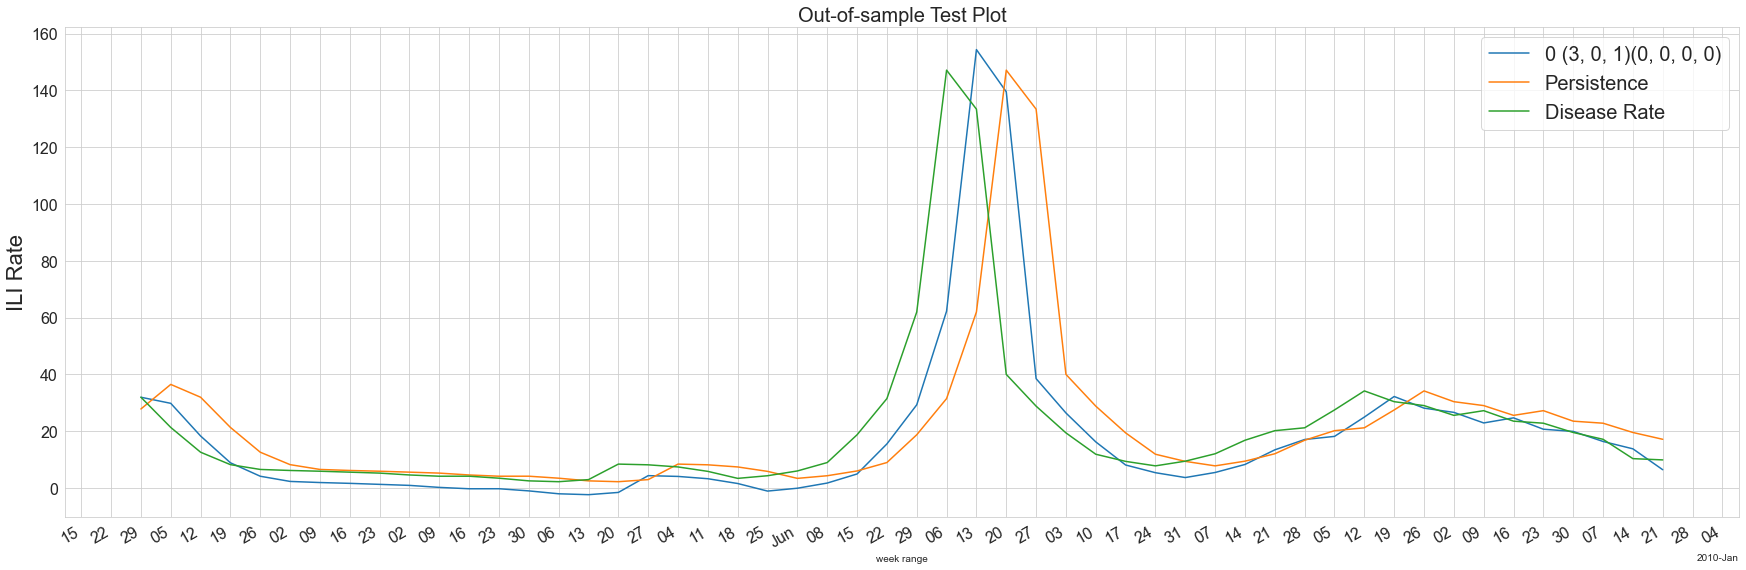

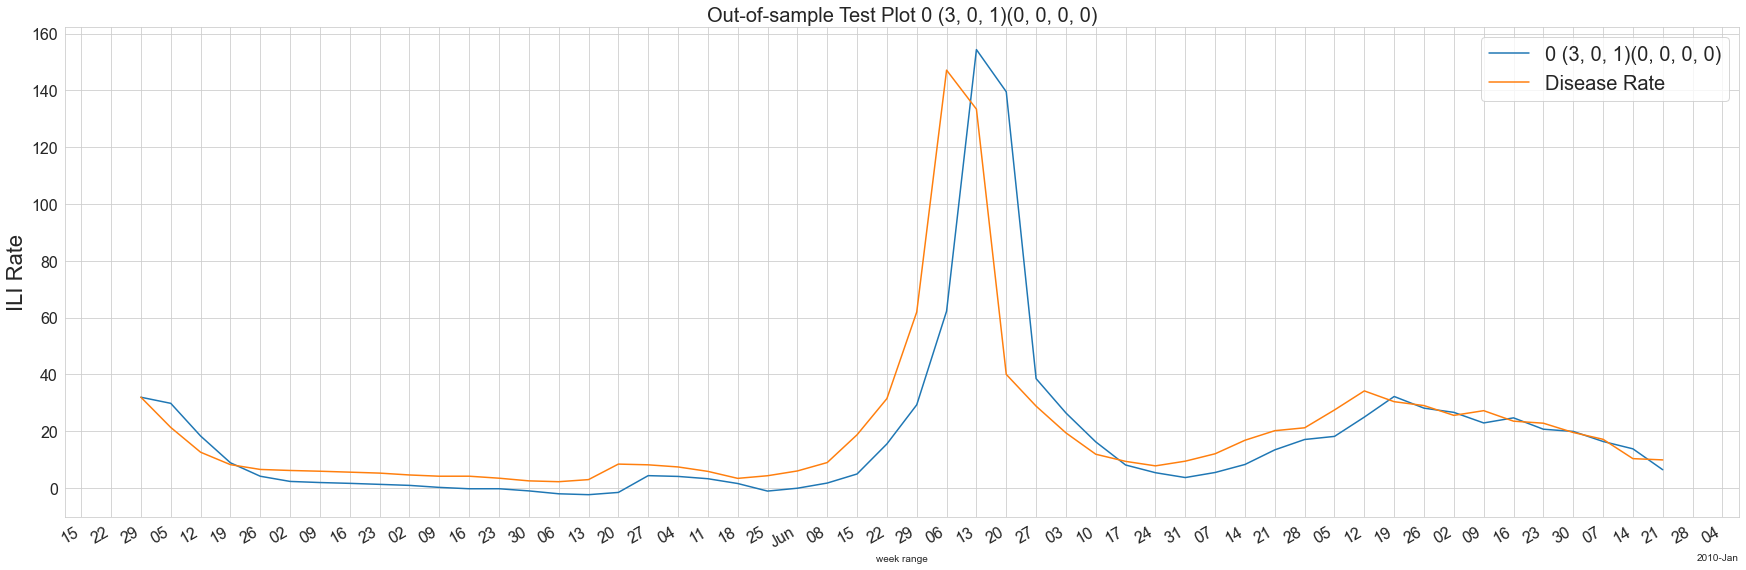

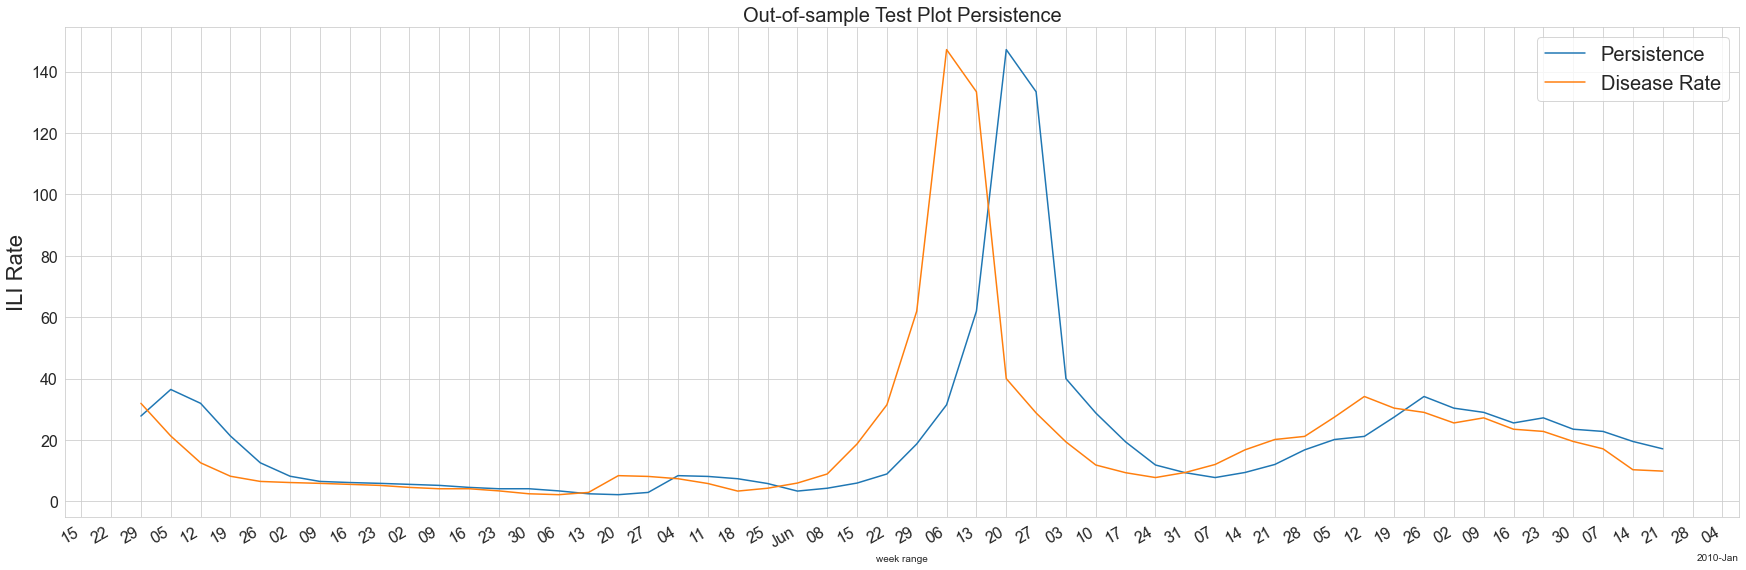

In [34]:
ar_model_report.plot_models(multi_plot=True)